In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

In [77]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/data/output.csv"
meps_df = pd.read_csv(path, sep = ";")

In [78]:
meps_df.head()

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,...,born_month,born_year,disability,born_lat,born_lon,relatives,educated_at,highest_degree,occupation,born_region
0,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,DEU,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,...,4.0,1986.0,NaN,51.513.888.888,7.465.277.777,NaN,NaN,university,"politician,journalist,manager",native
1,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,ITA,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,...,10.0,1971.0,NaN,41.35,13.416.666.666,NaN,Sapienza University of Rome,university,"politician,businessperson,lawyer,manager",native
2,124739,carlos zorrinho,Zorrinho,Carlos,PT,S&D,MALE,PRT,"DACP,ITRE,DAFR,DEVE,DMAS",Óbidos,...,5.0,1959.0,NaN,39.361.952,-9.157.131,NaN,University of Évora,phd,"politician,official,professor",native
3,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,FRA,"ITRE,JURI,D-US,DLAT,ENVI",LILLE,...,5.0,1987.0,NaN,50.631.944.444,30.575,NaN,Sciences Po,NaN,"lawyer,politician,activist",native
4,124812,fabio massimo castaldo,Castaldo,Fabio Massimo,IT,Renew,MALE,ITA,"AFET,SEDE,ECON,D-CL,DSCA,DLAT,DEPA",Rome,...,9.0,1985.0,NaN,41.893.055.555,12.482.777.777,NaN,Tor Vergata University of Rome,university,"politician,lawyer",native


In [79]:
group_list = list(set(meps_df["group"].tolist()))
country_list = list(set(meps_df["country"].tolist()))

In [68]:
org_list = []
for list_entry in meps_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
org_list = list(set(org_list))
org_list.remove("nan")
org_list[:5]

['D-BR', 'ENVI', 'D-IL', 'DSCA', 'TRAN']

In [69]:
committee_list = [org for org in org_list if org[0] != "D"]
committee_list[:5]

['ENVI', 'TRAN', 'ECON', 'LIBE', 'AGRI']

In [70]:
occupation_list = []
for list_entry in meps_df["occupation"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            occupation_list.append(entry)
occupation_list = list(set(occupation_list))
occupation_list.remove("nan")
occupation_list[:5]

['athlete', 'manager', 'architect', 'q63755179', 'pianist']

In [71]:
degree_list = ["secondary", "university", "phd"]

In [72]:
educated_at_list = []
for list_entry in meps_df["educated_at"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            educated_at_list.append(entry)
educated_at_list = list(set(educated_at_list))
#for entry in educated_at_list:
#    filter_educated_at_list = educated_at_list.copy()
#    filter_educated_at_list.remove(entry)
#    for second_entry in filter_educated_at_list:
#        if entry in second_entry and entry in educated_at_list:
#            educated_at_list.remove(entry)
#educated_at_list.remove("nan")
educated_at_list[:5]

['Lindenwood University',
 'Comenius University',
 'IV Liceum Ogólnokształcące in Łódź',
 'University of Finance and Administration',
 'University of Giessen']

## Gender

In [73]:
def filter_women_perc_df(column, column_entries, meps_df):
    gender_dict = {}
    non_na_df = meps_df.loc[meps_df[column].notna()]
    for column_entry in column_entries:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(column_entry)]
        female_count = len(filter_df.loc[filter_df["gender"] == "FEMALE"].index)
        if len(filter_df.index > 0):
            female_percentage = female_count / len(filter_df.index) * 100
            gender_dict[column_entry] = female_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.rename(columns = {0: "Percentage of women"})
    return filter_percentage_df.sort_values("Percentage of women")

How many MEPs are female?

In [74]:
gender_percentages_df = pd.DataFrame(meps_df.value_counts("gender"))
gender_percentages_df = gender_percentages_df.reset_index().rename(columns = {0: "count"})
gender_percentages_df["percentage"] = gender_percentages_df["count"] / gender_percentages_df["count"].sum()
gender_percentages_df

,gender,count,percentage
0,MALE,425,0.602837
1,FEMALE,280,0.397163


How is that split along faction lines?

In [75]:
group_women_perc_df = filter_women_perc_df("group", group_list, meps_df)
group_women_perc_df.sort_values("Percentage of women")

,Percentage of women
ECR,27.941176
NI,31.372549
PPE,37.288136
ID,37.288136
Renew,42.156863
S&D,43.165468
Verts/ALE,48.611111
The Left,51.351351


How is split along country lines?

In [13]:
country_women_perc_df = filter_women_perc_df("country", country_list, meps_df)
country_women_perc_df.sort_values("Percentage of women")[:10]
#country_women_perc_df = country_women_perc_df.reset_index().rename(columns = {"index": "country"})
#country_women_perc_df.to_csv("gender_country.csv", index = False)

,Percentage of women
RO,15.151515
CY,16.666667
GR,23.809524
LT,27.272727
EE,28.571429
SK,28.571429
BG,29.411765
CZ,33.333333
MT,33.333333
HR,33.333333


In [14]:
country_women_perc_df.sort_values("Percentage of women", ascending = False)[:10]

,Percentage of women
LU,66.666667
FI,57.142857
SE,52.380952
ES,50.847458
LV,50.000000
FR,48.101266
PT,47.619048
IT,46.052632
NL,44.827586
DK,42.857143


How about per committee?

In [15]:
committee_percentage_df = filter_women_perc_df("memberships", committee_list, meps_df)
committee_percentage_df.sort_values("Percentage of women")[:10]

,Percentage of women
AFCO,21.818182
SEDE,26.785714
BUDG,27.272727
AFET,29.220779
ECON,30.172414
FISC,31.372549
JURI,33.333333
TRAN,34.693878
CONT,35.087719
PETI,36.363636


In [16]:
committee_percentage_df.sort_values("Percentage of women", ascending = False)[:10]

,Percentage of women
FEMM,85.294118
EMPL,56.310680
SANT,53.571429
ENVI,47.953216
CULT,44.067797
IMCO,44.047619
PECH,44.000000
LIBE,43.703704
REGI,41.666667
AGRI,39.560440


In [17]:
memberships_df = meps_df.loc[meps_df["memberships"].notna()]
memberships_df = memberships_df.loc[memberships_df["memberships"].str.contains("AFCO")]
memberships_df["gender"].value_counts()

MALE      43
FEMALE    12
Name: gender, dtype: int64

## Place of birth

Where were MEPs born?

In [61]:
meps_df["born_region"].value_counts()

native    567
other     104
eu         20
Name: born_region, dtype: int64

Which countries have MEPs born in other countries?

In [19]:
origins_by_country_df = meps_df.groupby("country")["born_region"].value_counts().unstack(fill_value=0)
origins_by_country_df = origins_by_country_df.reset_index()[["country", "native", "eu", "other"]]
origins_by_country_df["total"] = origins_by_country_df[["native", "eu", "other"]].sum(axis = 1)
origins_by_country_df["total"] = round(origins_by_country_df[["native", "eu", "other"]].sum(axis = 1), 2)
origins_by_country_df["native_pc"] = round(origins_by_country_df["native"] / origins_by_country_df["total"], 2)
origins_by_country_df["eu_pc"] = round(origins_by_country_df["eu"] / origins_by_country_df["total"], 2)
origins_by_country_df["other_pc"] = round(origins_by_country_df["other"] / origins_by_country_df["total"], 2)
origins_by_country_df = origins_by_country_df.sort_values(by = "native_pc", ascending = False)
origins_by_country_df[:10]

born_region,country,native,eu,other,total,native_pc,eu_pc,other_pc
25,SI,8,0,0,8,1.00,0.00,0.00
4,CZ,21,0,0,21,1.00,0.00,0.00
7,EE,7,0,0,7,1.00,0.00,0.00
9,FI,13,0,0,13,1.00,0.00,0.00
19,MT,6,0,0,6,1.00,0.00,0.00
18,LV,7,0,0,7,1.00,0.00,0.00
15,IT,74,0,1,75,0.99,0.00,0.01
5,DE,90,1,4,95,0.95,0.01,0.04
0,AT,15,1,0,16,0.94,0.06,0.00
6,DK,13,0,1,14,0.93,0.00,0.07


In [20]:
non_native_df = origins_by_country_df[["country", "eu_pc", "other_pc"]]
non_native_df["non_native_pc"] = (non_native_df["eu_pc"] + non_native_df["other_pc"]) * 100
non_native_df = non_native_df.drop(["eu_pc", "other_pc"], axis = 1)
non_native_df = non_native_df.sort_values("non_native_pc", ascending = False)
non_native_df.to_csv("non_native.csv", index = False, sep =";")
non_native_df[:10]

C:\Users\lorga\AppData\Local\Temp\ipykernel_20440\3790901719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_native_df["non_native_pc"] = (non_native_df["eu_pc"] + non_native_df["other_pc"]) * 100


born_region,country,non_native_pc
3,CY,60.0
23,RO,45.0
8,ES,43.0
11,GR,43.0
13,HU,30.0
24,SE,30.0
16,LT,30.0
2,BG,29.0
12,HR,25.0
21,PL,23.0


Wurden diese Abgeordneten in der EU oder außerhalb geboren?

In [21]:
origins_by_country_df.sort_values("eu_pc", ascending = False).head()

born_region,country,native,eu,other,total,native_pc,eu_pc,other_pc
13,HU,14,3,3,20,0.70,0.15,0.15
23,RO,18,4,11,33,0.55,0.12,0.33
12,HR,9,1,2,12,0.75,0.08,0.17
26,SK,12,1,1,14,0.86,0.07,0.07
0,AT,15,1,0,16,0.94,0.06,0.00


In [22]:
origins_by_country_df.sort_values("other_pc", ascending = False).head()

born_region,country,native,eu,other,total,native_pc,eu_pc,other_pc
3,CY,2,0,3,5,0.40,0.00,0.60
11,GR,12,0,9,21,0.57,0.00,0.43
8,ES,33,2,23,58,0.57,0.03,0.40
23,RO,18,4,11,33,0.55,0.12,0.33
16,LT,7,0,3,10,0.70,0.00,0.30


Which German MEPs were not born in Germany?

In [23]:
meps_df.loc[(meps_df["country"] == "DE") & (meps_df["born_region"] != "native")]

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,...,born_month,born_year,disability,born_lat,born_lon,relatives,educated_at,highest_degree,occupation,born_region
221,197459,pierrette herzberger-fofana,Herzberger-Fofana,Pierrette,DE,Verts/ALE,FEMALE,DEU,"DEVE,DPAP,DACP,DAFR,DCAR,AFET,FEMM",Bamako,...,3.0,1949.0,NaN,12.645.833.333,-7.992.222.222,NaN,"University of Erlangen–Nuremberg,Trier University",NaN,politician,other
508,251268,michael kauch,Kauch,Michael,DE,Renew,MALE,DEU,"ITRE,D-IL,AFET,ECON,DACP,DAFR",NaN,...,5.0,1967.0,NaN,NaN,NaN,NaN,NaN,university,"manager,marketeer,politician,consultant",NaN
558,197460,sergey lagodinsky,Lagodinsky,Sergey,DE,Verts/ALE,MALE,DEU,"D-TR,JURI,DEPA,AFET,LIBE,DSCA,D-US",Astrakhan,...,12.0,1975.0,NaN,46.35,48.035,NaN,John F. Kennedy School of Government,phd,"lawyer,politician",other
560,197468,özlem demirel,Demirel,Özlem,DE,The Left,FEMALE,DEU,"SEDE,D-TR,EMPL,AFET",Malatya,...,3.0,1984.0,NaN,3.835.062,383.094,NaN,University of Bonn,NaN,politician,other
636,232843,jan henrik ovelgönne,OVELGÖNNE,Jan Henrik,DE,Verts/ALE,MALE,DEU,"AFET,ECON,IMCO",Volkach,...,6.0,1975.0,NaN,1.022.813,NaN,NaN,NaN,university,"politician,journalist,manager",other
696,197465,niklas nienass,Nienaß,Niklas,DE,Verts/ALE,MALE,DEU,"ITRE,REGI,CULT,DCAS,AFCO,D-AF",Marl,...,4.0,1992.0,NaN,709.038,NaN,NaN,NaN,NaN,NaN,eu


## Education

For how many MEPs do we have degree data?

In [83]:
len(meps_df.loc[meps_df["highest_degree"].notna()].index)

326

In [63]:
len(meps_df.loc[meps_df["educated_at"].notna()].index)

453

What are the highest degrees that MEPs have achieved?

In [25]:
degree_count_df = pd.DataFrame(meps_df.value_counts("highest_degree"))
degree_count_df = degree_count_df.reindex(degree_list)
degree_count_df = degree_count_df.reset_index().rename(columns = {0: "count"})
degree_count_df.to_csv("degree_count.csv", index = False, sep =";")
degree_count_df

,highest_degree,count
0,secondary,8
1,university,214
2,phd,104


Does degree composition change along group lines?

In [26]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    degree_dict = {}
    for degree in degree_list:
        degree_dict[degree] = 0
    notna_df = group_df.loc[group_df["highest_degree"].notna()]["highest_degree"]
    for entry in notna_df.tolist():
        for degree in degree_list:
            if degree in entry:
                degree_dict[degree] += 1
    overall_dict[group] = degree_dict
group_degree_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_degree_df["total"] = group_degree_df.sum(axis = 1)
for column in group_degree_df.columns:
    group_degree_df[column] = round(group_degree_df[column] / group_degree_df["total"] * 100, 2)
group_degree_df = group_degree_df.drop(columns = "total")
group_degree_df

,secondary,university,phd
S&D,0.00,59.46,40.54
PPE,2.25,65.17,32.58
NI,0.00,55.56,44.44
The Left,0.00,70.00,30.00
Verts/ALE,6.06,72.73,21.21
Renew,1.89,79.25,18.87
ID,11.11,61.11,27.78
ECR,4.55,59.09,36.36


Where were MEPs educated?

In [27]:
notna_df = meps_df.loc[meps_df["educated_at"].notna()]["educated_at"]
educated_at_df = notna_df.value_counts("educated_at")
educated_at_dict = {}
for entry in notna_df.tolist():
    for university in entry.split(","):
        if university not in educated_at_dict.keys():
            educated_at_dict[university] = 1
        else:
            educated_at_dict[university] += 1
educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
educated_at_df = educated_at_df.rename(columns = {0: "count"})
educated_at_df = educated_at_df.drop(index = "Faculty of Law and Administration")
educated_at_df = educated_at_df.sort_values("count", ascending = False)
educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university"})
educated_at_df = educated_at_df[:10]
educated_at_df.to_csv("educated_at.csv", index = False, sep =";")
educated_at_df

,university,count
0,Sciences Po,14
1,Eötvös Loránd University,11
2,University of Vienna,8
3,University of Latvia,7
4,National and Kapodistrian University of Athens,7
5,University of Tartu,7
6,Sapienza University of Rome,7
7,Complutense University of Madrid,7
8,University of Bologna,7
9,Bocconi University,6


In which countries are MEPs likely to have gone to the same universities?

In [28]:
def get_top_uni_pc(column, entry):
    filter_df = meps_df.loc[meps_df[column] == entry]
    educated_at_dict = {}
    for educated_at in educated_at_list:
        educated_at_dict[educated_at] = 0
    notna_df = filter_df.loc[meps_df["educated_at"].notna()]["educated_at"]
    for entry in notna_df.tolist():
        for educated_at in educated_at_list:
            if educated_at in entry:
                educated_at_dict[educated_at] += 1
    educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
    educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university", 0: "count"})
    educated_at_df = educated_at_df.sort_values(by = "count", ascending = False)
    mep_count = len(notna_df.index)
    total_mep_count = len(filter_df.index)
    top_uni = educated_at_df["university"].values[0]
    top_uni_count = educated_at_df["count"].values[0]
    top_uni_pc = round(top_uni_count / mep_count * 100, 2)
    return top_uni, top_uni_pc, top_uni_count, mep_count, total_mep_count

In [84]:
country_uni_dict = {}
for country in country_list:
    country_uni_dict[country] = get_top_uni_pc("country", country)
country_uni_df = pd.DataFrame.from_dict(country_uni_dict, orient = "index")
country_uni_df = country_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
country_uni_df = country_uni_df.sort_values("percentage", ascending = False)
country_uni_df

,university,percentage,meps,meps_with_data,total_meps
EE,University of Tartu,100.00,7,7,7
CY,National and Kapodistrian University of Athens,100.00,2,2,6
LV,University of Latvia,100.00,7,7,8
SI,University of Ljubljana,71.43,5,7,8
HR,University of Zagreb,70.00,7,10,12
LT,Vilnius University,66.67,6,9,11
MT,University of Malta,60.00,3,5,6
HU,Eötvös Loránd University,55.00,11,20,21
PT,University of Lisbon,50.00,5,10,21
LU,University of Vienna,50.00,2,4,6


What about groups?

In [30]:
group_uni_dict = {}
for group in group_list:
    group_uni_dict[group] = get_top_uni_pc("group", group)
group_uni_df = pd.DataFrame.from_dict(group_uni_dict, orient = "index")
group_uni_df = group_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
group_uni_df = group_uni_df.sort_values("percentage", ascending = False)
group_uni_df

,university,percentage,meps,meps_with_data,total_meps
NI,Eötvös Loránd University,17.14,6,35,51
The Left,National and Kapodistrian University of Athens,14.29,3,21,37
Verts/ALE,Free University Berlin,8.89,4,45,72
ECR,University of Warsaw,8.70,4,46,68
ID,Panthéon-Assas University,6.67,2,30,59
Renew,Sciences Po,5.63,4,71,102
S&D,University of Bologna,4.30,4,93,139
PPE,Faculty of Law,3.57,4,112,177


## Occupations

How about occupation data?

In [31]:
len(meps_df.loc[meps_df["occupation"].notna()].index)

655

What are the most common occupations?

In [32]:
occupation_dict = {}
for occupation in occupation_list:
    occupation_dict[occupation] = 0
notna_df = meps_df.loc[meps_df["occupation"].notna()]["occupation"]
for entry in notna_df.tolist():
    for occupation in occupation_list:
        if occupation in entry:
            occupation_dict[occupation] += 1
occupation_count_df = pd.DataFrame.from_dict(occupation_dict, orient = "index")
occupation_count_df = occupation_count_df.rename(columns = {0: "count"})
occupation_count_df = occupation_count_df.sort_values("count", ascending = False)
occupation_count_df["percentage"] = round(occupation_count_df["count"] / len(notna_df.index), 3) * 100
occupation_count_df = occupation_count_df.drop(columns = "count", index = "politician")
occupation_count_df = occupation_count_df.reset_index().rename(columns = {"index": "occupation"})
occupation_count_df = occupation_count_df[:10]
occupation_count_df.to_csv("occupation_count.csv", index = False, sep =";")
occupation_count_df

,occupation,percentage
0,manager,23.8
1,lawyer,18.5
2,researcher,15.4
3,official,13.1
4,professor,12.2
5,journalist,10.5
6,teacher,7.2
7,consultant,4.7
8,engineer,3.7
9,diplomat,3.7


Does occupation composition change along group lines?

In [33]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    occupation_dict = {}
    for occupation in occupation_list:
        occupation_dict[occupation] = 0
    notna_df = group_df.loc[group_df["occupation"].notna()]["occupation"]
    for entry in notna_df.tolist():
        for occupation in occupation_list:
            if occupation in entry:
                occupation_dict[occupation] += 1
    overall_dict[group] = occupation_dict
group_occupation_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_occupation_df["total"] = group_occupation_df.sum(axis = 1)
for column in group_occupation_df.columns:
    group_occupation_df[column] = round(group_occupation_df[column] / group_occupation_df["total"] * 100, 2)
group_occupation_df = group_occupation_df.drop(columns = "total")
group_occupation_df

,athlete,manager,architect,q63755179,pianist,businessperson,french environment and energy management agency,photographer,poet,trade unionist,...,chinovnik,esperantist,journalist,actor,cook,meteorologist,columnist,pediatrician,ethnologist,translator
S&D,0.29,10.06,0.00,0.0,0.00,0.00,0.00,0.29,0.00,1.15,...,0.00,0.00,4.02,0.00,0.00,0.00,0.29,0.00,0.00,0.57
PPE,1.04,10.94,0.00,0.0,0.00,1.56,0.00,0.00,0.26,0.52,...,0.00,0.26,3.65,0.26,0.00,0.00,0.00,0.26,0.00,0.00
NI,0.76,10.61,0.76,0.0,0.00,0.76,0.00,0.00,0.00,0.00,...,0.00,0.00,4.55,1.52,0.00,0.00,0.00,0.00,0.00,0.00
The Left,4.17,6.94,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.78,...,0.00,0.00,4.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Verts/ALE,0.68,8.11,0.00,0.0,0.68,0.68,0.68,0.68,0.00,0.00,...,0.00,0.00,2.70,0.68,0.68,0.68,0.00,0.00,0.00,0.68
Renew,0.00,13.93,0.00,0.0,0.00,0.41,0.00,0.00,0.00,0.41,...,0.41,0.00,6.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ID,0.00,4.50,0.00,0.9,0.00,4.50,0.00,0.00,0.00,0.90,...,0.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ECR,0.82,7.38,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.82,...,0.00,0.00,6.56,0.00,0.00,0.00,0.00,0.00,0.82,0.00


Is there a "lawyers' party"?

In [39]:
group_occupation_df["lawyer"].sort_values(ascending = False)

ID           14.41
PPE           9.64
NI            9.09
S&D           8.33
Renew         6.97
Verts/ALE     4.05
ECR           2.46
The Left      1.39
Name: lawyer, dtype: float64

Is there a "farmers' party"?

In [40]:
group_occupation_df["farmer"].sort_values(ascending = False)

Renew        2.46
Verts/ALE    1.35
PPE          1.04
NI           0.76
S&D          0.57
The Left     0.00
ID           0.00
ECR          0.00
Name: farmer, dtype: float64

Hoes does occupation by sector compare to the general population?

In [41]:
employment_sector_df = pd.read_csv("C:/Users/lorga/Desktop/Parlament/analysis/employment_by_sector_reference.csv")
employment_sector_df = employment_sector_df.loc[employment_sector_df["geo"] == "EU27_2020"]
employment_sector_df = employment_sector_df[["nace_r2", "OBS_VALUE"]]
employment_sector_df["nace_r2"] = employment_sector_df["nace_r2"].replace({
    "A": "agriculture", 
    "B-E": "industry (except construction)",
    "C": "manufacturing",
    "F": "construction",
    "G-I": "wholesale and retail trading",
    "J": "communication",
    "K": "financial",
    "L": "real estate",
    "M_N": "research & administration",
    "O-Q": "public service",
    "R-U": "arts & entertainment",
    "TOTAL": "total"
})
employment_sector_df = employment_sector_df.transpose()
employment_sector_df.columns = employment_sector_df.iloc[0]
employment_sector_df = employment_sector_df[1:]
employment_sector_df

nace_r2,agriculture,industry (except construction),manufacturing,construction,wholesale and retail trading,communication,financial,real estate,research & administration,public service,arts & entertainment,total
OBS_VALUE,4.1,15.4,13.9,6.7,24.2,3.3,2.3,1.1,12.9,24.1,5.9,100.0


## Age

In [82]:
len(meps_df.loc[meps_df["born_year"].notna()].index)

705

When were MEPs born?

In [42]:
meps_birthyear_df = pd.DataFrame(meps_df["born_year"].value_counts())
meps_birthyear_df = meps_birthyear_df.reset_index().rename(columns = {"index": "year", "born_year": "count"})
meps_birthyear_df = meps_birthyear_df.sort_values(by = "year")
meps_birthyear_df = meps_birthyear_df.loc[meps_birthyear_df["year"] > 1900]
meps_birthyear_df.head()

,year,count
50,1940.0,1
45,1944.0,3
47,1945.0,2
49,1946.0,2
46,1947.0,3


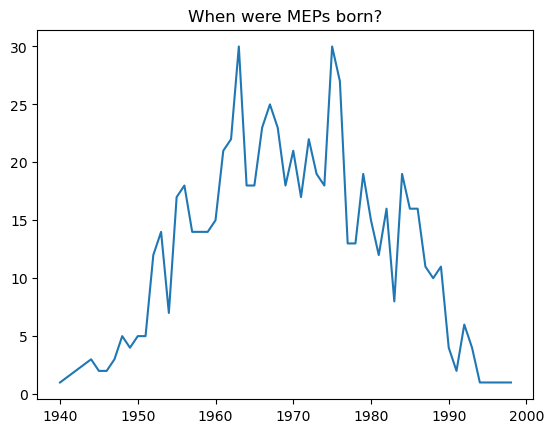

In [43]:
plt.plot(meps_birthyear_df["year"], meps_birthyear_df['count'])
plt.title("When were MEPs born?")
plt.show()

What's the Parliament's median age?

In [44]:
not_na_df = meps_df.loc[meps_df["born_year"].notna()]
birth_dates = not_na_df["born_year"].tolist()
ages = [(2024 - birth_date) for birth_date in birth_dates]
ages = sorted(ages)
median_age = ages[round(len(ages) / 2)]
median_age = round(median_age, 1)
median_age

55.0

How do committees vary in median age?

In [45]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    df = df.loc[meps_df["born_year"].notna()]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        birth_dates = filter_df["born_year"].tolist()
        ages = [(2024 - birth_date) for birth_date in birth_dates]
        ages = sorted(ages)
        median_age = ages[round(len(ages) / 2)]
        median_age = round(median_age)
        median_age_dict[filter_entry] = median_age
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": "org", 0: "median_age"})
    median_age_df = median_age_df.sort_values("median_age")
    return median_age_df

In [46]:
committee_median_age_df = get_median_age("memberships", committee_list, meps_df)
committee_median_age_df = committee_median_age_df.rename(columns = {"org": "committee"})
committee_median_age_df[:10]

,committee,median_age
3,LIBE,50
16,PETI,51
12,SANT,51
20,IMCO,51
0,ENVI,53
14,JURI,53
13,ITRE,53
11,FEMM,53
18,EMPL,54
10,CULT,54


In [47]:
committee_median_age_df.sort_values("median_age", ascending = False)[:10]

,committee,median_age
15,AFCO,59
21,SEDE,57
19,INTA,57
17,FISC,56
4,AGRI,56
2,ECON,55
5,CONT,55
6,PECH,55
7,BUDG,55
9,REGI,54


In [93]:
org_median_age_df = get_median_age("memberships", org_list, meps_df)
org_median_age_df[:10]

,org,median_age
39,D-IQ,49
23,LIBE,50
35,DPAL,51
69,IMCO,51
61,PETI,51
59,D-AF,51
57,D-AL,51
52,SANT,51
8,D-CA,51
32,D-ME,51


In [95]:
org_median_age_df.sort_values("median_age", ascending = False)[:10]

,org,median_age
49,D-BY,63
13,DPAC,62
58,DNAT,62
64,DPAP,60
46,DEVE,60
27,D-UA,59
2,D-IL,59
60,AFCO,59
3,DSCA,59
51,DCAS,59


In [48]:
group_median_age_df = get_median_age("group", group_list, meps_df)
group_median_age_df = group_median_age_df.rename(columns = {"org": "group"})
group_median_age_df.sort_values("median_age")

,group,median_age
4,Verts/ALE,49
3,The Left,51
5,Renew,52
2,NI,54
1,PPE,55
0,S&D,56
6,ID,57
7,ECR,59


Does median age differ from country to country?

In [49]:
country_median_age_df = get_median_age("country", country_list, meps_df)
country_median_age_df = country_median_age_df.rename(columns = {"org": "country"})
country_median_age_df.head()

,country,median_age
4,MT,45
20,PT,48
13,CZ,49
10,HU,49
17,NL,50


How does that compare to countries' median ages?

In [50]:
ages_df = pd.read_csv("C:/Users/lorga/Desktop/Parlament/analysis/ages.csv")
ages_df = ages_df.rename(columns = {" years": "country_median"})
ages_df = ages_df[["slug", "country_median"]]
ages_df.head()

,slug,country_median
0,monaco,56.2
1,italy,48.1
2,andorra,48.1
3,germany,46.7
4,spain,46.3


In [88]:
median_age_difference_df = country_median_age_df
def get_country_code(slug):
    code_dict = {
        "MT": "malta",
        "NL": "netherlands",
        "CZ": "czechia",
        "HU": "hungary",
        "PT": "portugal",
        "SE": "sweden",
        "BG": "bulgaria",
        "HR": "croatia",
        "DE": "germany",
        "ES": "spain",
        "RO": "romania",
        "AT": "austria",
        "BE": "belgium",
        "IT": "italy",
        "SK": "slovakia",
        "FR": "france",
        "DK": "denmark",
        "IE": "ireland",
        "EE": "estonia",
        "GR": "greece",
        "SI": "slovenia",
        "CY": "cyprus",
        "LU": "luxembourg",
        "PL": "poland",
        "FI": "finland",
        "LV": "latvia",
        "LT": "lithuania"
    }
    return code_dict[slug]
median_age_difference_df["slug"] = median_age_difference_df["country"].apply(get_country_code)
median_age_difference_df = median_age_difference_df.rename(columns = {"median_age": "mep_median"})
median_age_difference_df = median_age_difference_df.merge(ages_df, on = "slug", how = "left")
median_age_difference_df = median_age_difference_df.drop(["country"], axis = 1)
median_age_difference_df = median_age_difference_df.rename(columns = {"slug": "country"})
median_age_difference_df["country_median"] = round(median_age_difference_df["country_median"], 0).astype(int)
median_age_difference_df["difference"] = median_age_difference_df["mep_median"] - median_age_difference_df["country_median"]
median_age_difference_df = median_age_difference_df.sort_values("country_median", ascending = False)
median_age_difference_df.to_csv("median_age_difference.csv", index = False, sep =";")
median_age_difference_df

,mep_median,country,country_median,difference
13,55,italy,48,7
8,54,germany,47,7
10,54,spain,46,8
20,59,slovenia,46,13
19,59,greece,46,13
1,48,portugal,46,2
25,66,latvia,45,21
18,58,estonia,45,13
12,55,austria,45,10
11,54,romania,45,9
